In [1]:
import pandas as pd
import numpy as np

In [2]:
# change local path to the json files
%cd D:\uni\9 Spring 2023\Stat 535\yelp
businesses = pd.read_json("yelp_academic_dataset_business.json", lines=True, orient='columns', chunksize=1000000)
reviews = pd.read_json("yelp_academic_dataset_review.json", lines=True, orient='columns', chunksize=1000000)

D:\uni\9 Spring 2023\Stat 535\yelp


In [3]:
for business in businesses:
    subset_business = business
    break
    
for review in reviews:
    subset_review = review
    break

In [4]:
subset_business.shape

(150346, 14)

In [5]:
subset_business.head()

business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.955505  -75.155564    4.0            80        1   
4  40.338183  -75.471659    4.5            13        1   

                                          attributes  \
0                      {'ByAppointmentOnly': 'True'}   
1             {'BusinessAcceptsCreditCards': 'True'}   
2  {'BikeParking': 'True', 'BusinessAcceptsCredit...   
3  {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
4  {'BusinessAcceptsCreditCards': 'True', 'Wheelc...   

                                          categories  \
0  Doctors, Traditional Chinese Medicine, Naturop...   
1  Shipping Centers, Local Services, Notaries, Ma...   
2  Department Stores, Shopping, Fashion, Home & G...   
3  Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                          Brewpubs, Breweries, Food   

                                               hours  
0                                               None  
1  {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...  
2  {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...  
3  {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...  
4  {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...

In [6]:
subset_review.shape

(1000000, 9)

In [7]:
subset_review.head()

review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delicious.   Our favo... 2015-01-04 00:01:03  
4  Cute interior and owner (?) gave us tour of up... 2017-01-14 20:54:15

In [8]:
subset_business.groupby(['state'])['review_count'].sum().sort_values()

state
XMS          5
MT           6
MI           9
VT          10
VI          10
UT          19
WA          19
NC          29
CO          30
HI          32
TX          33
SD          42
MA          43
IL       49676
DE       67370
AB      105477
ID      152086
NJ      249837
CA      339637
NV      409950
AZ      412639
IN      472565
MO      483897
TN      598195
LA      743176
FL     1119926
PA     1540790
Name: review_count, dtype: int64

In [9]:
state = subset_business[(subset_business['state'] == 'PA') & (subset_business['is_open'] == 1)]
penn = state[['business_id','name','address', 'city', 'state', 'categories', 'attributes','stars', 'review_count']]
penn

business_id                                 name  \
3       MTSW4McQd7CbVtyjqoe9mw                   St Honore Pastries   
4       mWMc6_wTdE0EUBKIGXDVfA             Perkiomen Valley Brewery   
15      MUTTqe8uqyMdBl186RmNeA                             Tuna Bar   
19      ROeacJQwBeh05Rqg7F6TCg                                  BAP   
25      PSo_C1Sfa13JHjzVNW6ziQ        Indian Walk Veterinary Center   
...                        ...                                  ...   
150325  l9eLGG9ZKpLJzboZq-9LRQ                                 Wawa   
150326  JDM7kiCEmeBc_5W-z6eZZw              2601 Parkway Apartments   
150329  9U1Igcpe954LoWZRmNc-zg  Hand & Stone Massage And Facial Spa   
150334  LJ4GjQ1HL6kqvIPpNUNNaQ             Shanti Yoga and Ayurveda   
150336  WnT9NIzQgLlILjPT0kEcsQ        Adelita Taqueria & Restaurant   

                             address             city state  \
3                        935 Race St     Philadelphia    PA   
4                      101 Walnut St       Green Lane    PA   
15                       205 Race St     Philadelphia    PA   
19                     1224 South St     Philadelphia    PA   
25                     662 Durham Rd          Newtown    PA   
...                              ...              ...   ...   
150325               19 N Bishop Ave  Clifton Heights    PA   
150326         2601 Pennsylvania Ave     Philadelphia    PA   
150329  1100 S Columbus Blvd, Ste 24     Philadelphia    PA   
150334            1638 Pine St, Fl 1     Philadelphia    PA   
150336                 1108 S 9th St     Philadelphia    PA   

                                               categories  \
3       Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                               Brewpubs, Breweries, Food   
15                      Sushi Bars, Restaurants, Japanese   
19                                    Korean, Restaurants   
25        Pet Services, Pet Groomers, Pets, Veterinarians   
...                                                   ...   
150325  Restaurants, Sandwiches, Convenience Stores, C...   
150326             Real Estate, Apartments, Home Services   
150329        Day Spas, Beauty & Spas, Skin Care, Massage   
150334  Health & Medical, Yoga, Shopping, Naturopathic...   
150336                               Restaurants, Mexican   

                                               attributes  stars  review_count  
3       {'RestaurantsDelivery': 'False', 'OutdoorSeati...    4.0            80  
4       {'BusinessAcceptsCreditCards': 'True', 'Wheelc...    4.5            13  
15      {'RestaurantsReservations': 'True', 'Restauran...    4.0           245  
19      {'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...    4.5           205  
25                                                   None    5.0            15  
...                                                   ...    ...           ...  
150325  {'BikeParking': 'True', 'BusinessAcceptsCredit...    3.0            11  
150326             {'BusinessAcceptsCreditCards': 'True'}    3.0             6  
150329  {'BusinessAcceptsCreditCards': 'True', 'Wheelc...    3.0            32  
150334  {'ByAppointmentOnly': 'True', 'GoodForKids': '...    4.5            39  
150336  {'WheelchairAccessible': 'False', 'Restaurants...    4.5            35  

[26289 rows x 9 columns]

In [10]:
rest = penn[penn['categories'].str.contains('Restaurant.*')==True].reset_index()
rest

index             business_id                           name  \
0          3  MTSW4McQd7CbVtyjqoe9mw             St Honore Pastries   
1         15  MUTTqe8uqyMdBl186RmNeA                       Tuna Bar   
2         19  ROeacJQwBeh05Rqg7F6TCg                            BAP   
3         33  kV_Q1oqis8Qli8dUoGpTyQ                  Ardmore Pizza   
4         35  aPNXGTDkf-4bjhyMBQxqpQ                     Craft Hall   
...      ...                     ...                            ...   
8067  150269  2dVJ7R-3JMmu2v4DJYtBbw             Spring Mount Hotel   
8068  150297  Wko0HNelt55ZIp3Dm3eD2g              Swiss Farms Store   
8069  150306  wVxXRFf10zTTAs11nr4xeA                   PrimoHoagies   
8070  150325  l9eLGG9ZKpLJzboZq-9LRQ                           Wawa   
8071  150336  WnT9NIzQgLlILjPT0kEcsQ  Adelita Taqueria & Restaurant   

                 address             city state  \
0            935 Race St     Philadelphia    PA   
1            205 Race St     Philadelphia    PA   
2          1224 South St     Philadelphia    PA   
3      10 Rittenhouse Pl          Ardmore    PA   
4     901 N Delaware Ave     Philadelphia    PA   
...                  ...              ...   ...   
8067           3 Main St    Schwenksville    PA   
8068  600 Baltimore Pike      Springfield    PA   
8069      6024 Ridge Ave     Philadelphia    PA   
8070     19 N Bishop Ave  Clifton Heights    PA   
8071       1108 S 9th St     Philadelphia    PA   

                                             categories  \
0     Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
1                     Sushi Bars, Restaurants, Japanese   
2                                   Korean, Restaurants   
3                                    Pizza, Restaurants   
4     Eatertainment, Arts & Entertainment, Brewpubs,...   
...                                                 ...   
8067  Nightlife, Cafes, Hotels, Bars, Hotels & Trave...   
8068  Convenience Stores, Sandwiches, Restaurants, F...   
8069  Restaurants, Specialty Food, Food, Sandwiches,...   
8070  Restaurants, Sandwiches, Convenience Stores, C...   
8071                               Restaurants, Mexican   

                                             attributes  stars  review_count  
0     {'RestaurantsDelivery': 'False', 'OutdoorSeati...    4.0            80  
1     {'RestaurantsReservations': 'True', 'Restauran...    4.0           245  
2     {'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...    4.5           205  
3     {'RestaurantsGoodForGroups': 'True', 'WiFi': '...    3.5           109  
4     {'OutdoorSeating': 'True', 'RestaurantsPriceRa...    3.5            65  
...                                                 ...    ...           ...  
8067  {'RestaurantsPriceRange2': '2', 'RestaurantsRe...    2.0             5  
8068  {'RestaurantsPriceRange2': '2', 'BusinessAccep...    3.5             5  
8069  {'NoiseLevel': 'u'average'', 'RestaurantsTakeO...    3.0            55  
8070  {'BikeParking': 'True', 'BusinessAcceptsCredit...    3.0            11  
8071  {'WheelchairAccessible': 'False', 'Restaurants...    4.5            35  

[8072 rows x 10 columns]

# Data Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

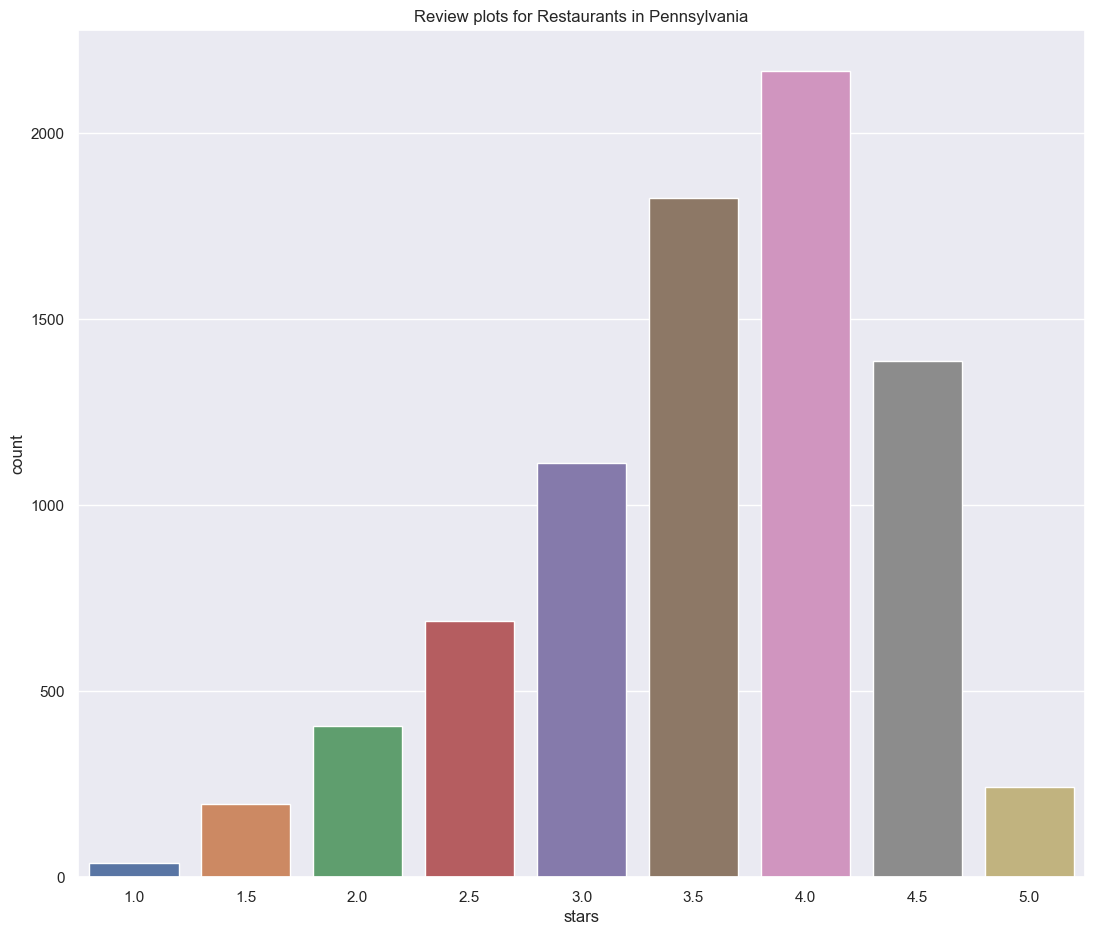

In [48]:
fig, ax = plt.subplots(figsize = (13,11))
sns.countplot(data = rest, x = rest['stars'], ax=ax)
plt.title('Review plots for Restaurants in Pennsylvania')
plt.show()

[Text(0.5, 0, 'Restaurant'), Text(0, 0.5, 'Review Count')]

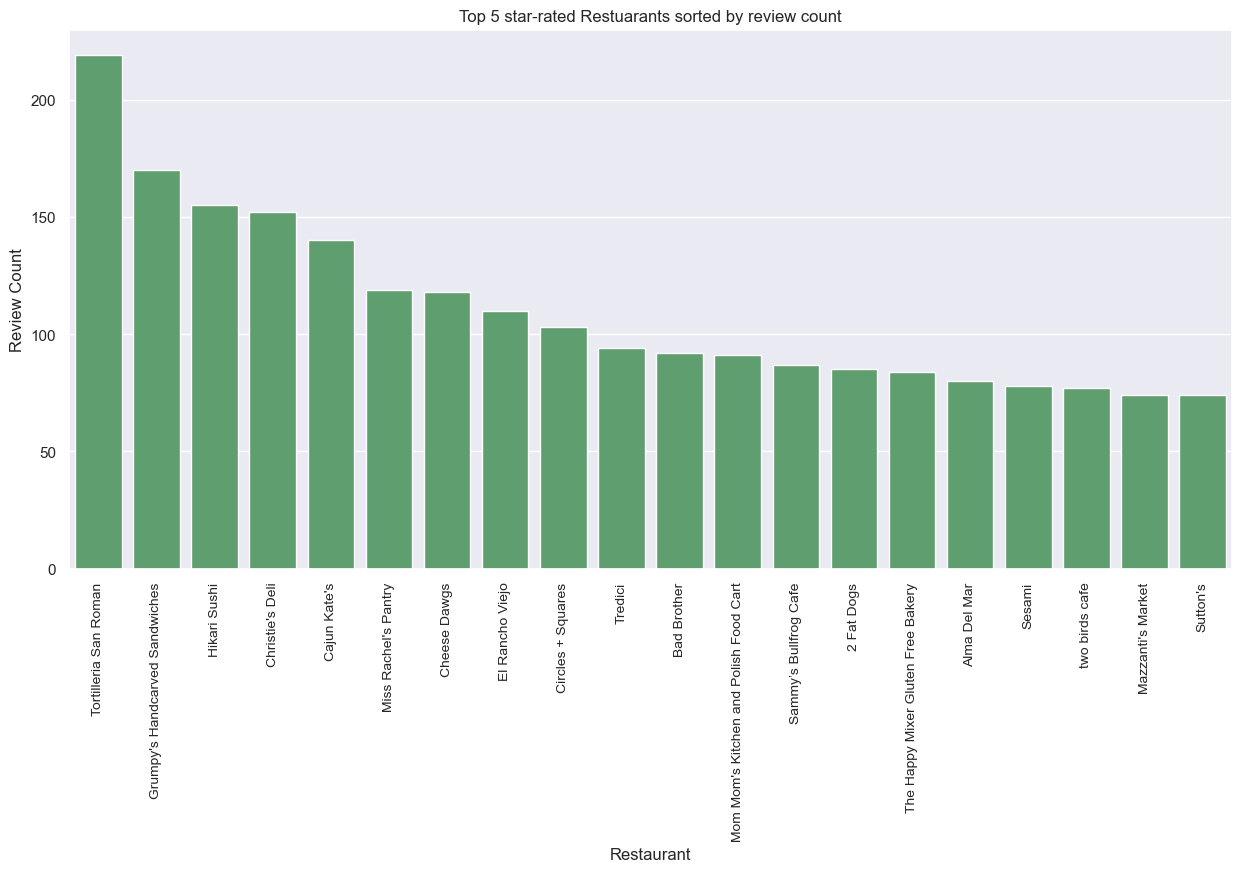

In [13]:
top_res = rest[rest["stars"]==5]
top_res = top_res.sort_values('review_count', ascending=False).head(20)

plt.figure(figsize=(15,7))
p = sns.barplot(x='name', y="review_count", data=top_res,color="g")
p.set_xticklabels(p.get_xticklabels(), rotation = 90, fontsize = 10)
p.set_title("Top 5 star-rated Restuarants sorted by review count")
p.set(xlabel="Restaurant", ylabel="Review Count")

[Text(0.5, 0, 'Restaurant'), Text(0, 0.5, 'Review Count')]

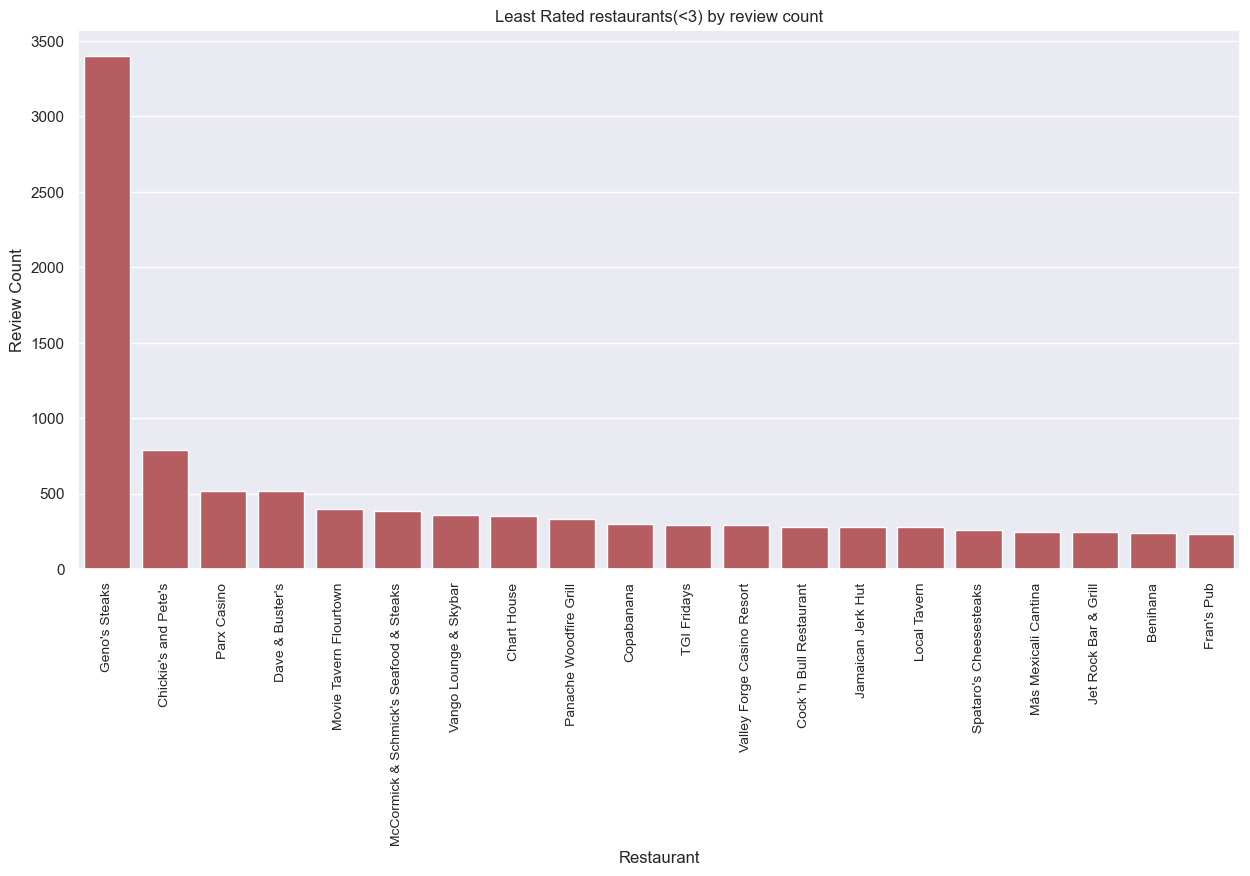

In [14]:
bot_res = rest[rest["stars"]< 3]
bot_res = bot_res.sort_values('review_count', ascending=False).head(20)

plt.figure(figsize=(15,7))
p = sns.barplot(x='name', y="review_count", data=bot_res,color="r")
p.set_xticklabels(p.get_xticklabels(), rotation = 90, fontsize = 10)
p.set_title("Least Rated restaurants(<3) by review count")
p.set(xlabel="Restaurant", ylabel="Review Count")

# Data Preprocessing

In [15]:
# Function that extract keys from the nested dictionary
def extract_keys(attr, key):
    if attr == None:
        return "{}"
    if key in attr:
        return attr.pop(key)

# convert string to dictionary
import ast
def str_to_dict(attr):
    if attr != None:
        return ast.literal_eval(attr)
    else:
        return ast.literal_eval("{}") 


In [16]:
# get dummies from nested attributes
rest['BusinessParking'] = rest.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'BusinessParking')), axis=1)
rest['Ambience'] = rest.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'Ambience')), axis=1)
rest['GoodForMeal'] = rest.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'GoodForMeal')), axis=1)
rest['Dietary'] = rest.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'Dietary')), axis=1)
rest['Music'] = rest.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'Music')), axis=1)

In [17]:
rest

index             business_id                           name  \
0          3  MTSW4McQd7CbVtyjqoe9mw             St Honore Pastries   
1         15  MUTTqe8uqyMdBl186RmNeA                       Tuna Bar   
2         19  ROeacJQwBeh05Rqg7F6TCg                            BAP   
3         33  kV_Q1oqis8Qli8dUoGpTyQ                  Ardmore Pizza   
4         35  aPNXGTDkf-4bjhyMBQxqpQ                     Craft Hall   
...      ...                     ...                            ...   
8067  150269  2dVJ7R-3JMmu2v4DJYtBbw             Spring Mount Hotel   
8068  150297  Wko0HNelt55ZIp3Dm3eD2g              Swiss Farms Store   
8069  150306  wVxXRFf10zTTAs11nr4xeA                   PrimoHoagies   
8070  150325  l9eLGG9ZKpLJzboZq-9LRQ                           Wawa   
8071  150336  WnT9NIzQgLlILjPT0kEcsQ  Adelita Taqueria & Restaurant   

                 address             city state  \
0            935 Race St     Philadelphia    PA   
1            205 Race St     Philadelphia    PA   
2          1224 South St     Philadelphia    PA   
3      10 Rittenhouse Pl          Ardmore    PA   
4     901 N Delaware Ave     Philadelphia    PA   
...                  ...              ...   ...   
8067           3 Main St    Schwenksville    PA   
8068  600 Baltimore Pike      Springfield    PA   
8069      6024 Ridge Ave     Philadelphia    PA   
8070     19 N Bishop Ave  Clifton Heights    PA   
8071       1108 S 9th St     Philadelphia    PA   

                                             categories  \
0     Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
1                     Sushi Bars, Restaurants, Japanese   
2                                   Korean, Restaurants   
3                                    Pizza, Restaurants   
4     Eatertainment, Arts & Entertainment, Brewpubs,...   
...                                                 ...   
8067  Nightlife, Cafes, Hotels, Bars, Hotels & Trave...   
8068  Convenience Stores, Sandwiches, Restaurants, F...   
8069  Restaurants, Specialty Food, Food, Sandwiches,...   
8070  Restaurants, Sandwiches, Convenience Stores, C...   
8071                               Restaurants, Mexican   

                                             attributes  stars  review_count  \
0     {'RestaurantsDelivery': 'False', 'OutdoorSeati...    4.0            80   
1     {'RestaurantsReservations': 'True', 'Restauran...    4.0           245   
2     {'NoiseLevel': 'u'quiet'', 'RestaurantsGoodFor...    4.5           205   
3     {'RestaurantsGoodForGroups': 'True', 'WiFi': '...    3.5           109   
4     {'OutdoorSeating': 'True', 'RestaurantsPriceRa...    3.5            65   
...                                                 ...    ...           ...   
8067  {'RestaurantsPriceRange2': '2', 'RestaurantsRe...    2.0             5   
8068  {'RestaurantsPriceRange2': '2', 'BusinessAccep...    3.5             5   
8069  {'NoiseLevel': 'u'average'', 'RestaurantsTakeO...    3.0            55   
8070  {'BikeParking': 'True', 'BusinessAcceptsCredit...    3.0            11   
8071  {'WheelchairAccessible': 'False', 'Restaurants...    4.5            35   

                                        BusinessParking  \
0     {'garage': False, 'street': True, 'validated':...   
1     {'valet': False, 'garage': None, 'street': Tru...   
2     {'garage': False, 'street': True, 'validated':...   
3     {'garage': False, 'street': True, 'validated':...   
4     {'garage': False, 'street': False, 'validated'...   
...                                                 ...   
8067                                                 {}   
8068                                                 {}   
8069  {'garage': False, 'street': True, 'validated':...   
8070  {'garage': False, 'street': False, 'validated'...   
8071  {'garage': None, 'street': True, 'validated': ...   

                                               Ambience  \
0                                                    {}   
1     {'touristy': False, 'hipster': False, 

In [18]:
# create table with attribute dummies
df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
                    rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series), 
                    rest['Dietary'].apply(pd.Series) ], axis=1)
df_attr_dummies = pd.get_dummies(df_attr)

#this step takes about 30s to 1min and creates warning messages.

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\User

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\User

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\User

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\User

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\User

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\User

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\User

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\User

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
C:\User

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The defau

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The defau

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The defau

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The defau

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The defau

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The defau

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The defau

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The defau

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The defau

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The defau

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The defau

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The defau

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The defau

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The defau

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series),
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:3: FutureWarning: The defau

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Sp

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Sp

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Sp

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Sp

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Sp

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Sp

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Sp

C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rest['Dietary'].apply(pd.Series) ], axis=1)
C:\Users\kakoi\AppData\Local\Temp\ipykernel_38892\3964269525.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Sp

In [19]:
# get dummies from categories
df_categories_dummies = pd.Series(rest['categories']).str.get_dummies(',')
df_categories_dummies

Acai Bowls   Accessories   Accountants   Active Life   Adult  \
0               0             0             0             0       0   
1               0             0             0             0       0   
2               0             0             0             0       0   
3               0             0             0             0       0   
4               0             0             0             0       0   
...           ...           ...           ...           ...     ...   
8067            0             0             0             0       0   
8068            0             0             0             0       0   
8069            0             0             0             0       0   
8070            0             0             0             0       0   
8071            0             0             0             0       0   

       Adult Entertainment   Afghan   African   Airport Lounges  \
0                        0        0         0                 0   
1                        0        0         0                 0   
2                        0        0         0                 0   
3                        0        0         0                 0   
4                        0        0         0                 0   
...                    ...      ...       ...               ...   
8067                     0        0         0                 0   
8068                     0        0         0                 0   
8069                     0        0         0                 0   
8070                     0        0         0                 0   
8071                     0        0         0                 0   

       Airport Shuttles  ...  Venues & Event Spaces  Video Game Stores  \
0                     0  ...                      0                  0   
1                     0  ...                      0                  0   
2                     0  ...                      0                  0   
3                     0  ...                      0                  0   
4                     0  ...                      0                  0   
...                 ...  ...                    ...                ...   
8067                  0  ...                      0                  0   
8068                  0  ...                      0                  0   
8069                  0  ...                      0                  0   
8070                  0  ...                      0                  0   
8071                  0  ...                      0                  0   

      Vietnamese  Waffles  Wedding Planning  Wheel & Rim Repair  Wine Bars  \
0              0        0                 0                   0          0   
1              0        0                 0                   0          0   
2              0        0                 0                   0          0   
3              0        0                 0                   0          0   
4              0        0                 0                   0          0   
...          ...      ...               ...                 ...        ...   
8067           0        0                 0                   0          0   
8068           0        0                 0                   0          0   
8069           0        0                 0                   0          0   
8070           0        0                 0                   0          0   
8071           0        0                 0                   0          0   

      Wineries  Wraps  Yoga  
0            0      0     0  
1            0      0     0  
2            0      0     0  
3            0      0     0  
4            0      0     0  
...        ...    ...   ...  
8067         0      0     0  
8068         0      0     0  
8069         0      0     0  
8070         0      0     0  
8071         0      0     0  

[8072 rows x 688 columns]

In [20]:
# pull out names and stars from rest table 
result = rest[['name','stars']]
result

name  stars
0                St Honore Pastries    4.0
1                          Tuna Bar    4.0
2                               BAP    4.5
3                     Ardmore Pizza    3.5
4                        Craft Hall    3.5
...                             ...    ...
8067             Spring Mount Hotel    2.0
8068              Swiss Farms Store    3.5
8069                   PrimoHoagies    3.0
8070                           Wawa    3.0
8071  Adelita Taqueria & Restaurant    4.5

[8072 rows x 2 columns]

In [21]:
df_final = pd.concat([df_attr_dummies, df_categories_dummies, result], axis=1)
df_final.drop('Restaurants',inplace=True,axis=1)
df_final

RestaurantsDelivery_False  RestaurantsDelivery_None  \
0                             1                         0   
1                             0                         0   
2                             0                         1   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
8067                          1                         0   
8068                          0                         0   
8069                          0                         0   
8070                          0                         0   
8071                          0                         0   

      RestaurantsDelivery_True  OutdoorSeating_False  OutdoorSeating_None  \
0                            0                     1                    0   
1                            1                     0                    0   
2                            0                     0                    1   
3                            1                     1                    0   
4                            1                     0                    0   
...                        ...                   ...                  ...   
8067                         0                     0                    0   
8068                         1                     0                    0   
8069                         1                     1                    0   
8070                         1                     0                    0   
8071                         1                     1                    0   

      OutdoorSeating_True  BusinessAcceptsCreditCards_False  \
0                       0                                 1   
1                       1                                 0   
2                       0                                 0   
3                       0                                 0   
4                       1                                 0   
...                   ...                               ...   
8067                    0                                 0   
8068                    0                                 0   
8069                    0                                 0   
8070                    0                                 0   
8071                    0                                 0   

      BusinessAcceptsCreditCards_None  BusinessAcceptsCreditCards_True  \
0                                   0                                0   
1                                   0                                1   
2                                   0                                1   
3                                   0                                1   
4                                   0                                1   
...                               ...                              ...   
8067                                0                                0   
8068                                0                                1   
8069                                0                                1   
8070                                0                                1   
8071                                0                                1   

      BikeParking_False  ...  Vietnamese  Waffles  Wedding Planning  \
0                     0  ...           0        0                 0   
1                     0  ...           0        0                 0   
2                     0  ...           0        0                 0   
3                     0  ...           0        0                 0   
4                     0  ...           0        0                 0   
...                 ...  ...         ...      ...               ...   
8067                  0  ...           0        0                 0   
8068                  0  ...           0        0                 0   
8069                  0  ...           0        0              

In [22]:
mapper = {1.0:1,1.5:2, 2.0:2, 2.5:3, 3.0:3, 3.5:4, 4.0:4, 4.5:5, 5.0:5}
df_final['stars'] = df_final['stars'].map(mapper)

In [23]:
df_final

RestaurantsDelivery_False  RestaurantsDelivery_None  \
0                             1                         0   
1                             0                         0   
2                             0                         1   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
8067                          1                         0   
8068                          0                         0   
8069                          0                         0   
8070                          0                         0   
8071                          0                         0   

      RestaurantsDelivery_True  OutdoorSeating_False  OutdoorSeating_None  \
0                            0                     1                    0   
1                            1                     0                    0   
2                            0                     0                    1   
3                            1                     1                    0   
4                            1                     0                    0   
...                        ...                   ...                  ...   
8067                         0                     0                    0   
8068                         1                     0                    0   
8069                         1                     1                    0   
8070                         1                     0                    0   
8071                         1                     1                    0   

      OutdoorSeating_True  BusinessAcceptsCreditCards_False  \
0                       0                                 1   
1                       1                                 0   
2                       0                                 0   
3                       0                                 0   
4                       1                                 0   
...                   ...                               ...   
8067                    0                                 0   
8068                    0                                 0   
8069                    0                                 0   
8070                    0                                 0   
8071                    0                                 0   

      BusinessAcceptsCreditCards_None  BusinessAcceptsCreditCards_True  \
0                                   0                                0   
1                                   0                                1   
2                                   0                                1   
3                                   0                                1   
4                                   0                                1   
...                               ...                              ...   
8067                                0                                0   
8068                                0                                1   
8069                                0                                1   
8070                                0                                1   
8071                                0                                1   

      BikeParking_False  ...  Vietnamese  Waffles  Wedding Planning  \
0                     0  ...           0        0                 0   
1                     0  ...           0        0                 0   
2                     0  ...           0        0                 0   
3                     0  ...           0        0                 0   
4                     0  ...           0        0                 0   
...                 ...  ...         ...      ...               ...   
8067                  0  ...           0        0                 0   
8068                  0  ...           0        0                 0   
8069                  0  ...           0        0              

# KNN Content Based Recommendation

In [24]:
X = df_final.iloc[:,:-2]
y = df_final['stars']

In [25]:
from sklearn.model_selection import train_test_split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_knn, y_train_knn)

y_pred = knn.predict(X_test_knn)

accuracy_train = knn.score(X_train_knn, y_train_knn)
accuracy_test = knn.score(X_test_knn, y_test_knn)

print(f"Score on training set: {accuracy_train}")
print(f"Score on test set: {accuracy_test}")

Score on training set: 0.5731763977079138
Score on test set: 0.5256965944272446


In [27]:
display(df_final.iloc[-1:])
print("Validation set (Restaurant name): ", df_final['name'].values[-1])

RestaurantsDelivery_False  RestaurantsDelivery_None  \
8071                          0                         0   

      RestaurantsDelivery_True  OutdoorSeating_False  OutdoorSeating_None  \
8071                         1                     1                    0   

      OutdoorSeating_True  BusinessAcceptsCreditCards_False  \
8071                    0                                 0   

      BusinessAcceptsCreditCards_None  BusinessAcceptsCreditCards_True  \
8071                                0                                1   

      BikeParking_False  ...  Vietnamese  Waffles  Wedding Planning  \
8071                  0  ...           0        0                 0   

      Wheel & Rim Repair  Wine Bars  Wineries  Wraps  Yoga  \
8071                   0          0         0      0     0   

                               name  stars  
8071  Adelita Taqueria & Restaurant      5  

[1 rows x 919 columns]

Validation set (Restaurant name):  Adelita Taqueria & Restaurant


In [28]:
# test set from the df_final table (only last row): Restaurant name: "The Plum Pit"
test_set = df_final.iloc[-1:,:-2]

# validation set from the df_final table (exclude the last row)
X_val =  df_final.iloc[:-1,:-2]
y_val = df_final['stars'].iloc[:-1]

In [29]:
n_knn = knn.fit(X_val, y_val)

In [30]:
# distances and indeces from validation set (The Plum Pit)
distances, indices =  n_knn.kneighbors(test_set)
#n_knn.kneighbors(test_set)[1][0]

# create table distances and indeces from "The Plum Pit"
final_table = pd.DataFrame(n_knn.kneighbors(test_set)[0][0], columns = ['distance'])
final_table['index'] = n_knn.kneighbors(test_set)[1][0]
final_table.set_index('index')

distance
index          
1817   3.872983
7109   4.000000
7230   4.123106
7057   4.123106
7493   4.123106
4006   4.123106
2697   4.242641
6851   4.242641
1727   4.358899
7520   4.358899
2077   4.358899
2049   4.358899
2352   4.358899
7877   4.358899
4465   4.358899
1758   4.472136
97     4.472136
2678   4.472136
47     4.472136
2593   4.472136

In [31]:
# get names of the restaurant that similar to the "The Plum Pit"
result = final_table.join(df_final,on='index')
result[['distance','index','name','stars']].head(5)

distance  index                     name  stars
0  3.872983   1817      El Limon - Bensalem      5
1  4.000000   7109  Los Taquitos de Puebla       4
2  4.123106   7230         Bala Thai Bistro      5
3  4.123106   7057              Yummy Sushi      4
4  4.123106   7493             PrimoHoagies      4

# SVD Collaborative filtering

In [32]:
subset_review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [33]:
# pull out needed columns from subset_review table
df_review = subset_review[['user_id','business_id','stars', 'date']]
df_review

user_id             business_id  stars  \
0       mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw      3   
1       OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ      5   
2       8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A      3   
3       _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA      5   
4       bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ      4   
...                        ...                     ...    ...   
999995  oX7o1TH0PHUWp9r9ry9_vw  jLn69WQupjsDKrbPw_nlGQ      3   
999996  v8wlapFKVLs2qTYCGhCdiw  t6v8g8UeNiq3O2GoEc7R4Q      4   
999997  rLlYc1RzIBnOmnX3AbpEYw  ZYRul0i1bhOjirHED6Kd0w      3   
999998  eEH-8CEPU5ndPxDGzVfHiQ  onGXKwnxPLtKnO8yqQMPSA      1   
999999  HYmGwYXvcYmW7dDjuWKJfw  54vEFcAri3Wj6cdM4ljDBA      4   

                      date  
0      2018-07-07 22:09:11  
1      2012-01-03 15:28:18  
2      2014-02-05 20:30:30  
3      2015-01-04 00:01:03  
4      2017-01-14 20:54:15  
...                    ...  
999995 2017-11-15 09:43:07  
999996 2014-09-03 18:27:33  
999997 2016-02-20 22:25:29  
999998 2010-06-27 02:17:30  
999999 2012-11-05 03:25:02  

[1000000 rows x 4 columns]

In [34]:
# pull out names and addresses of the restaurants from rest table
restaurant = rest[['business_id', 'name', 'address']]
restaurant

business_id                           name  \
0     MTSW4McQd7CbVtyjqoe9mw             St Honore Pastries   
1     MUTTqe8uqyMdBl186RmNeA                       Tuna Bar   
2     ROeacJQwBeh05Rqg7F6TCg                            BAP   
3     kV_Q1oqis8Qli8dUoGpTyQ                  Ardmore Pizza   
4     aPNXGTDkf-4bjhyMBQxqpQ                     Craft Hall   
...                      ...                            ...   
8067  2dVJ7R-3JMmu2v4DJYtBbw             Spring Mount Hotel   
8068  Wko0HNelt55ZIp3Dm3eD2g              Swiss Farms Store   
8069  wVxXRFf10zTTAs11nr4xeA                   PrimoHoagies   
8070  l9eLGG9ZKpLJzboZq-9LRQ                           Wawa   
8071  WnT9NIzQgLlILjPT0kEcsQ  Adelita Taqueria & Restaurant   

                 address  
0            935 Race St  
1            205 Race St  
2          1224 South St  
3      10 Rittenhouse Pl  
4     901 N Delaware Ave  
...                  ...  
8067           3 Main St  
8068  600 Baltimore Pike  
8069      6024 Ridge Ave  
8070     19 N Bishop Ave  
8071       1108 S 9th St  

[8072 rows x 3 columns]

In [35]:
combined_business_data = pd.merge(df_review, restaurant, on='business_id')
combined_business_data

user_id             business_id  stars  \
0       mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw      3   
1       Iaee7y6zdSB3B-kRCo4z1w  XQfwVwDr-v0ZS3_CbbE5Xw      2   
2       ejFxLGqQcWNLdNByJlIhnQ  XQfwVwDr-v0ZS3_CbbE5Xw      4   
3       f7xa0p_1V9lx53iIGN5Sug  XQfwVwDr-v0ZS3_CbbE5Xw      3   
4       dCooFVCk8M1nVaQqcfTL3Q  XQfwVwDr-v0ZS3_CbbE5Xw      2   
...                        ...                     ...    ...   
124782  j2COG29Rqr4T_6kjEiOU7w  mzJ7BxxhLtm-TD1vyne1yg      5   
124783  5GMOJ3pT4-ye25qJocHX-Q  E0AKqwkebF15_hvzNSyGlQ      1   
124784  zOet7kNBcmn8i5hnt6CVZw  pEHtxCVO4YzDjWlBC5o7jA      5   
124785  xhN87RUEVbj-6tiKZBzLnQ  NH-LOS97SfP2aL_ZaLwUJA      1   
124786  mUsoSF5P4ssJfSQS4sDdhw  I21dVOT3pxwQVPECxRIJiA      5   

                      date                          name              address  
0      2018-07-07 22:09:11  Turning Point of North Wales  1460 Bethlehem Pike  
1      2017-05-13 17:06:55  Turning Point of North Wales  1460 Bethlehem Pike  
2      2017-08-08 00:58:18  Turning Point of North Wales  1460 Bethlehem Pike  
3      2017-11-19 02:20:23  Turning Point of North Wales  1460 Bethlehem Pike  
4      2017-09-09 17:49:47  Turning Point of North Wales  1460 Bethlehem Pike  
...                    ...                           ...                  ...  
124782 2019-02-09 04:58:02            Neighborhood Ramen         617 S 3rd St  
124783 2018-10-11 17:04:38                P. J. Clarke's        601 Walnut St  
124784 2019-04-07 17:20:19                   Aye Caramba        300 E High St  
124785 2018-11-04 18:11:28        High Street Provisions       3401 Walnut St  
124786 2014-06-20 14:07:11                      309 Deli  1618 Bethlehem Pike  

[124787 rows x 6 columns]

In [36]:
# the most POPULAR restaurants by stars.
combined_business_data.groupby('business_id')['stars'].count().sort_values(ascending=False).head()

business_id
EtKSTHV5Qx_Q7Aur9o4kQQ    1603
cXSyVvOr9YRN9diDkaWs0Q    1444
j-qtdD55OLfSqfsWuQTDJg    1436
S8ZFYEgMejpChID8tzKo9A    1304
vUrTGX_7HxqeoQ_6QCVz6g    1157
Name: stars, dtype: int64

In [37]:
# see the NAME of the most popular restaurant
Filter = combined_business_data['business_id'] == 'EtKSTHV5Qx_Q7Aur9o4kQQ'
print("Name: ", combined_business_data[Filter]['name'].unique())
print("Address:", combined_business_data[Filter]['address'].unique())

Name:  ['Village Whiskey']
Address: ['118 S 20th St']


The below code is making a table of (2991, 333313). This is too large so we might have to do random sample on restaurant names.

In [38]:
# create a user-item matrix
rating_crosstab = combined_business_data.pivot_table(values='stars', index='user_id', columns='name', fill_value=0)
rating_crosstab.head()

name                    'feine  1 Stop Pizza  16th Street Seafood  \
user_id                                                             
---r61b7EpVPkb4UVme5tA     0.0             0                    0   
--4AjktZiHowEIBCMd4CZA     0.0             0                    0   
--6PFZka7og6Khaw6oyjvQ     0.0             0                    0   
--9SwR3jQX-e3opxARFF_g     0.0             0                    0   
--HvBM9w_3UQ7SfpKsPkog     0.0             0                    0   

name                    17 Snyder Chinese  1st NE International Market  \
user_id                                                                  
---r61b7EpVPkb4UVme5tA                  0                            0   
--4AjktZiHowEIBCMd4CZA                  0                            0   
--6PFZka7og6Khaw6oyjvQ                  0                            0   
--9SwR3jQX-e3opxARFF_g                  0                            0   
--HvBM9w_3UQ7SfpKsPkog                  0                            0   

name                    2 Fat Dogs  2 in One Cafe  232 Corner Cafe  30 Main  \
user_id                                                                       
---r61b7EpVPkb4UVme5tA           0              0              0.0      0.0   
--4AjktZiHowEIBCMd4CZA           0              0              0.0      0.0   
--6PFZka7og6Khaw6oyjvQ           0              0              0.0      0.0   
--9SwR3jQX-e3opxARFF_g           0              0              0.0      0.0   
--HvBM9w_3UQ7SfpKsPkog           0              0              0.0      0.0   

name                    309 Deli  ...  Zio Pizza Palace & Grill  Zoes Kitchen  \
user_id                           ...                                           
---r61b7EpVPkb4UVme5tA         0  ...                         0           0.0   
--4AjktZiHowEIBCMd4CZA         0  ...                         0           0.0   
--6PFZka7og6Khaw6oyjvQ         0  ...                         0           0.0   
--9SwR3jQX-e3opxARFF_g         0  ...                         0           0.0   
--HvBM9w_3UQ7SfpKsPkog         0  ...                         0           0.0   

name                    Zorba's Taverna  Zoup!  Zuzu's Kitchen  chili's  \
user_id                                                                   
---r61b7EpVPkb4UVme5tA              0.0    0.0             0.0        0   
--4AjktZiHowEIBCMd4CZA              0.0    0.0             0.0        0   
--6PFZka7og6Khaw6oyjvQ              0.0    0.0             0.0        0   
--9SwR3jQX-e3opxARFF_g              0.0    0.0             0.0        0   
--HvBM9w_3UQ7SfpKsPkog              0.0    0.0             0.0        0   

name                    honeygrow  iPho Vietnamese Restaurant  revive 21  \
user_id                                                                    
---r61b7EpVPkb4UVme5tA        0.0                           0          0   
--4AjktZiHowEIBCMd4CZA        0.0                           0          0   
--6PFZka7og6Khaw6oyjvQ        0.0                           0          0   
--9SwR3jQX-e3opxARFF_g        0.0                           0          0   
--HvBM9w_3UQ7SfpKsPkog        0.0                           0          0   

name                    sweetgreen  
user_id                             
---r61b7EpVPkb4UVme5tA         0.0  
--4AjktZiHowEIBCMd4CZA         0.0  
--6PFZka7og6Khaw6oyjvQ         0.0  
--9SwR3jQX-e3opxARFF_g         0.0  
--HvBM9w_3UQ7SfpKsPkog         0.0  

[5 rows x 1299 columns]

In [39]:
rating_crosstab.shape

(72042, 1299)

In [40]:
X = rating_crosstab.values.T
X.shape

(1299, 72042)

In [41]:
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score


SVD = TruncatedSVD(n_components=12, random_state=17)
result_matrix = SVD.fit_transform(X)
result_matrix.shape

(1299, 12)

In [42]:
# PearsonR coef 
corr_matrix = np.corrcoef(result_matrix)
corr_matrix.shape

(1299, 1299)

In [43]:
# get the index of the popular restaurant
restaurant_names = rating_crosstab.columns
restaurants_list = list(restaurant_names)

popular_rest = restaurants_list.index('Village Whiskey')
print("index of the popular restaurant: ", popular_rest)

index of the popular restaurant:  1242


In [44]:
# restaurant of interest 
corr_popular_rest = corr_matrix[popular_rest]
corr_popular_rest.shape 

(1299,)

In [45]:
list(restaurant_names[(corr_popular_rest < 1.0) & (corr_popular_rest > 0.9)])

['Broad Table Tavern',
 'Halal Food Special',
 "Lew's Seafood Takeout Shop",
 'Prince Pizza II',
 'The Pizza Stop',
 'University Grille',
 'White Horse Tavern and Wine Bar']

In [46]:
display(rest[rest['name'] == 'Village Whiskey'])

index             business_id             name        address  \
571  10607  EtKSTHV5Qx_Q7Aur9o4kQQ  Village Whiskey  118 S 20th St   

             city state                                         categories  \
571  Philadelphia    PA  Bars, Nightlife, Whiskey Bars, Burgers, Restau...   

                                            attributes  stars  review_count  \
571  {'RestaurantsReservations': 'False', 'Restaura...    4.0          1553   

                                       BusinessParking  \
571  {'garage': False, 'street': True, 'validated':...   

                                              Ambience  \
571  {'touristy': False, 'hipster': False, 'romanti...   

                                           GoodForMeal Dietary  \
571  {'breakfast': False, 'brunch': False, 'lunch':...      {}   

                                                 Music  
571  {'dj': False, 'background_music': False, 'no_m...